In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Introduction
The general setting that we are investigating is how to best construct an interpretable and accurate statistical model when dealing with messy, real world data.  
For the sake of this talk we will assume that there is a single response variable $y$, a large number of predictor variables, $\textbf{x} \in \mathbb{R}^p$, and a large number of observations, $n$. We also assume that the number of observations grows with the number of predictor variables.
I am working on the COPDGene project, trying to use statistical models to help develop an understanding of the genetic basis for heterogeneity in COPD disease expression.
For one data set, the response variable of interest is a measure of the severity of COPD, and the set of predictor variables are the counts of a panel of $p>5000$ proteins$ and $n< 5000$ participants.   
Some properties of the data: 
1. Method in which the data was collected was not designed specifically for COPD. Thus, data is noisy, and many predictor variables are unrelated to COPD.
2. Possible (Probable (Definite)) strong correlation between predictor variables.  

Ideally, we would like to work with a modeling procedure that can identify the noisy, uninformative predictor variables, and deal with strong correlation that exists amongst the valuable predictor variables. Thankfully, there are methods that can can handle these scenarios quite effectively, which is what we are building towards. 


### Least Squares Regression 
When setting up a regression problem we start with the data:
\begin{align}
(\textbf{x}^i,y^i) 
\end{align}
where $\textbf{x}^i = (x_1^i, x_2^i, \cdots, x_p^i)$, are the regressors and $y^i$ is the response. We denote the number of observations a $n$ and the number of predictor variables as $p$.  
The typical linear regression model is given by
\begin{align}
y = \beta_0 + \beta_1x_1 + \cdots + \beta_m x_p +\epsilon, 
\end{align}
where $\beta_0 = \bar{y}$ and $\epsilon \sim N(0,1)$, and $\beta_1, \cdots, \beta_p$ are the coefficients that we are solving for.  
Notice that 
\begin{align}
E[y] &= E[\beta_0 + \beta_1x_1 + \cdots + \beta_p x_p +\epsilon]\\
     & = \beta_0 + \beta_1x_1 + \cdots + \beta_m x_m, 
\end{align}
This indicates that once we solve for the coefficients, our model yields a pointwise estimate of $E[y|\textbf{x}]$.
We can develop more complex linear models by projecting the data to higher dimensional vector spaces. An example would be to project the response variables to an $k-$dimensional polynomial vector space.  
If we consider a data scenario with 1 regressor variable, $x$, the projection of the response data to a $k-$dimensional polynomial vector space results in the following linear model.
$$
y = \beta_0 + \beta_1x + \beta_2x^2 \cdots + \beta_k x^k +\epsilon.
$$
The point is that any transformation or projection of the regressor data works for linear regression, as long as the model is linear in the coefficients.  
We compile the vectors of regressor data in a matrix $X$ and the vector of response variables in the vector $\textbf(y)$.  


Posed as an optimization problem, the goal of Least Squares (OLS) regression is to find a vector of coefficients, $\hat{\beta}$ that minimizes the distance between the linear model and $y$ with respect to the Euclidean 2-norm, where $\hat{\beta}$ is a statistical estimator for $\beta$.
$$
\min_{\hat{\beta} \in \mathbb{R}^p}|| y - X\hat{\beta}||_2^2
$$
The solution to the minimization problem leads to the unbiased estimator for $\beta$
$$\hat{\beta} = (X^TX)^{-1}X^Ty.$$
As a refresher, an unbiased estimator, $\hat{\mu}$, of a parameter $\mu$ has the desireable property of
$$
E[\hat{\mu}] = \mu.
$$

#### Issues that arise with OLS in High-DImensional Problems
If the predictor variable data is orthogonal, we can intepret the model coefficients as follows: the $i$th coefficient informs us to the unit expected change in $y$ given a unit change in a variable $x_i$.  
Without orthogonality of the predictor variables this interpretation of an OLS Regression model does not hold, as predictor variables cannot be changed independently.  
If an experiment cannot be designed in a way that leads to orthogonal factors, which is the case for most real world experiments, then there will be a strong degree of covariance among the predictor variables. Various methods have been devised that introduce orthogonality to the data, like the various forms of Principal Component Analysis (PCA), Projection to Latent Structures (PLS), and Ridge Regression. We are going to focus on Ridge Regression.


If covariance exists between two regressor variables, covariance between covariates can be "controlled" by regressing on a single predictor variable, and then training the residuals on the next regressor. This can continue until all coefficients of partial determination are found.
This process is ideal when the number of regressors is small, and

#### Ordinary Least Squares as a Convex Optimization Problem

### Cases Where OLS Fail to Produce Interpretable Results
1) Large correlation amongst the predictors variables, which leads to an ill-conditioned data matrix.   
Ill-Conditioning:= Small perturbation in the data can lead to large variation in the coefficients. 
For more information on ill-conditioned matrices, refer to [Trefethen, Lloyd N., Bau, David III](https://epubs.siam.org/doi/book/10.1137/1.9781611977165) 
This situation is classically treated using Ridge Regression (L2 Regularization).
2) In a high-dimensional parameter space OLS & Ridge Regression do not lead to sparse models, as all predictor coefficients are nonzero. The Lasso (L1 regularization) can be used to find sparse models, with predictor coefficients that are identically 0.


### Bias-Variance Tradeoff

### The Ridge Regressor ($L^2$ Regularization)
1. Background + References 
The Ridge Regression technique was first formally dicussed in the paper "Ridge Regression: Biased Estimation for Nonorthogonal Problems" by Hoerl and Kennard. 
[Hoerl, Arthur E., Kennard, Robert W.](https://homepages.math.uic.edu/~lreyzin/papers/ridge.pdf) 

### Correlation & Ill-Conditioning
One of the assumptions of OLS is that the predictor variables are not perfectly correlated. This assumption still allows for strong, although not 1-to-1, correlation between predictors in a regression model. In the case of correlated variables, the data matrix, X, is ill-conditioned or has very small, although not 0, eigenvalues.[Trefethen, Lloyd N., Bau, David III](https://epubs.siam.org/doi/book/10.1137/1.9781611977165)  
If a problem is ill-conditioned then a small change in the data can lead large variations in the solution. Translating this to the OLS problem
$$
\min_{\hat{\beta} \in \mathbb{R}^p}||X\hat{\beta} - y||
$$
a small perturbation in the data matrix $X$ can lead to large variations in $\hat{\beta}$, the estimators of $\beta$.   
This can be seen by performing analysis on the expected distance of the true $\beta$ values from their estimates, denoted by $\hat{\beta }$.  
Define:
1. Var($\hat{\beta}) = \sigma^2(X^TX)^{-1}$
2. $L_1^2 = (\hat{\beta} - \beta)^T(\hat{\beta} - \beta)$.   
It can be shown that
$$
E[L_1^2] = \sigma^2\text{Trace}(X^TX)^{-1}\\
\text{Var}[L_1^2] = 2 \sigma^4 \text{Trace}(X^TX)^{-2} 
$$
It follows that 
$$
E[L_1^2] = \sigma^2 \sum_{i=1}^m\frac{1}{\lambda_i}\\
\text{Var}[L_1^2] = 2 \sigma^4 \sum_{i=1}^m\frac{1}{\lambda_i^2}
$$
where $\lambda_{max} = \lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_M = \lambda_{min}$ are the eigenvalues of the matrix $X^TX$.  
In the case of strongly correlated predictors, these equations tell us that
1. The expected distance between the true and estimated $\beta$ values can be arbitrarily large.
2. The variance in the distance will be very large, thus leading to wild shifts in estimated $\beta$ values based on the data.


2. Formal Problem Statement
3. Motivation for Using Ridge Regression (Highly correlated data or ill-conditioned matrix)
4. Bias vs. Variance Trade-off
5. Examples demonstrating value of ridge regression and issues that arise with ridge regression
5 b. Toy problem with ill conditioned moatrx
6. Verifying Results

### Example Illustrating Issue w/Ill Conditioned Matrices

### Discuss the Variance Inflation and Whether it is Real or an Artifact (Talk to Yaning and Erin)

### Ridge Regression (OLS with $L_1$ Regularization)
A. E. Hoerl first formulated the ridge regressor as a solution to control the variance inflation caused by an ill conditioned matrix given by:
$$ X^TX +kI = X^Ty$$
Leading to the ridge normal equations
$$\hat{\beta}^{*} = (X^TX + kI)^{-1}X^Ty,$$
with $k\ge 0$. Denoted more compactly,
$$\hat{\beta}^{*} = WX^Ty,$$
In terms of the Ordinary Least Squares estimate for $\beta$, 
$$\hat{\beta} = (X^TX)^{-1}X^Ty,$$ 
the ridge regressor is given by
$$ \hat{\beta}^* = (I +k(X^TX)^{-1})\hat{\beta}.$$
Denoted more compactly,
$$ \hat{\beta}^* = Z\hat{\beta}.$$
Basic linear algebra results lead to the following eigenvalues for the modified ridge matrices.  
$$
\xi_i(W) = 1/(\lambda_i +k)\\
\xi_i(Z) = \lambda_i/(\lambda_i +k).\\
$$
We can see immediately that the small eigenvalues of $(X^TX^{-1})$ are modified by the factor $k\ge 0$.

### Reframing the Ridge Regression in Terms of $L_1$ distance


The motivation behind the Ridge Regressor is to control the size and variance of the estimators $\hat{\beta}$ at the expense of introducing bias into the model. Using the $L_1$ norm as a metric, it can be shown that there is always a Ridge esimator, $\hat{\beta}^*$, for $\beta$ that has a smaller $L_1$ value than the Ordinary Least Squares Estimator, $\hat{\beta}$. [Hoerl, Arthur E., Kennard, Robert W., Section 4](https://homepages.math.uic.edu/~lreyzin/papers/ridge.pdf) 


## Ridge Regression Example: 
### Strong Correlation Leading to an Ill-Conditioned Matrix

Text(0.5, 1.0, 'Histogram of Ridge (L2) Adjusted beta_3')

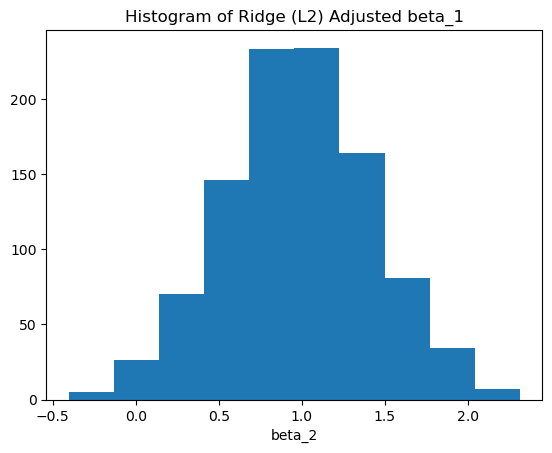

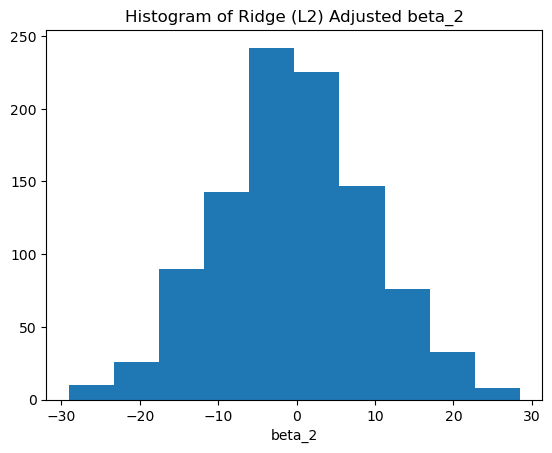

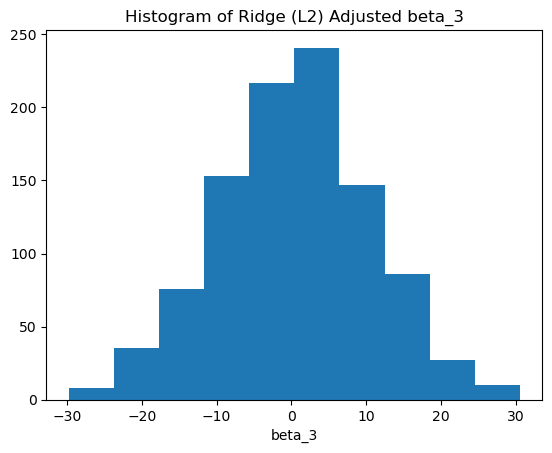

In [24]:
"""
Created on Tue Sep  5 18:33:33 2023

@author: evanshapiro
"""


U = np.array([[1,.999,0.99],[0,1,.95],[0,0,.01]])

C = np.dot(U.T,U)
mu = [0,0,0]
beta = np.array([1,0,0])

mv_norm = sp.stats.multivariate_normal( mean = mu, cov = C)
N  = 100
n = 1000
beta_h = np.zeros([n,3])
for i in range(0,n):
    X = mv_norm.rvs(size = N)
    y = np.dot(X,beta) + np.random.normal(0,1, size = N )
    beta_h[i,:] =  np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T,y))
    

#plt.hist2d(beta_h[:,0], beta_h[:,1])
#Create histograms of coefficients here 

#plt.hist2d(beta_h[:,0], beta_h[:,1])
#Create histograms of coefficients here   
plt.figure(2)
plt.hist(beta_h[:,0])
plt.xlabel('beta_2')
plt.title('Histogram of Ridge (L2) Adjusted beta_1')

plt.figure(3)
plt.hist(beta_h[:,1])
plt.xlabel('beta_2')
plt.title('Histogram of Ridge (L2) Adjusted beta_2')


plt.figure(4)
plt.hist(beta_h[:,2])
plt.xlabel('beta_3')
plt.title('Histogram of Ridge (L2) Adjusted beta_3')


### How does Ridge Regression Improve the Conditioning of a Matrix?

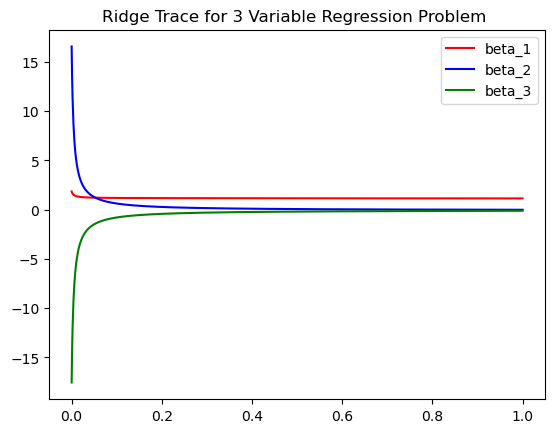

In [22]:


U = np.array([[1,.999,0.99],[0,1,.95],[0,0,.01]])

C = np.dot(U.T,U)
mu = [0,0,0]
beta = np.array([1,0,0])
mv_norm = sp.stats.multivariate_normal( mean = mu, cov = C)
N  = 100
n = 1000

#Implement ridge trace here keeping track of the trace
X = mv_norm.rvs(size = N)
y = np.dot(X,beta) + np.random.normal(0,1, size = N )
 
M = 1000
k = np.linspace(0,1,M)
beta_r = np.zeros([M,3])
for i in range(0,M):
    beta_r[i,:] = np.dot(np.linalg.inv(np.dot(X.T, X) + k[i]*np.identity(C.shape[0])),np.dot(X.T,y))
    
    
plt.figure(1)
plt.plot(k, beta_r[:,0], 'r', label = ' \beta_1')
plt.plot(k, beta_r[:,1], 'b', label = '\beta_2')
plt.plot(k, beta_r[:,2], 'g', label = '\beta_3')
plt.legend(["beta_1", "beta_2", "beta_3"])
plt.title('Ridge Trace for 3 Variable Regression Problem ')

beta_h = np.zeros([n,3])
for i in range(0,n):
    X = mv_norm.rvs(size = N)
    y = np.dot(X,beta) + np.random.normal(0,1, size = N )
    beta_h[i,:] =  np.dot(np.linalg.inv(np.dot(X.T, X) + 0.4*np.identity(C.shape[0])),np.dot(X.T,y))
    




Text(0.5, 1.0, 'Histogram of Ridge (L2) Adjusted beta_3')

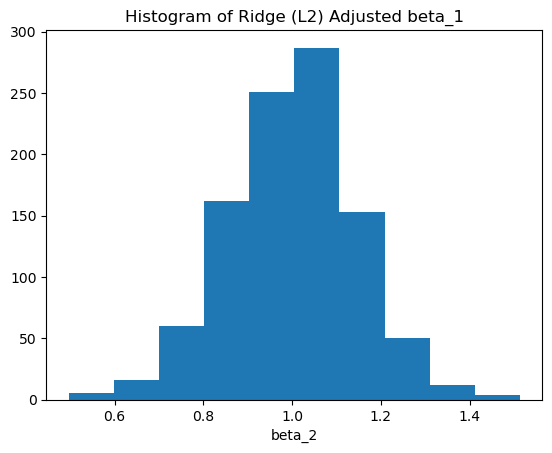

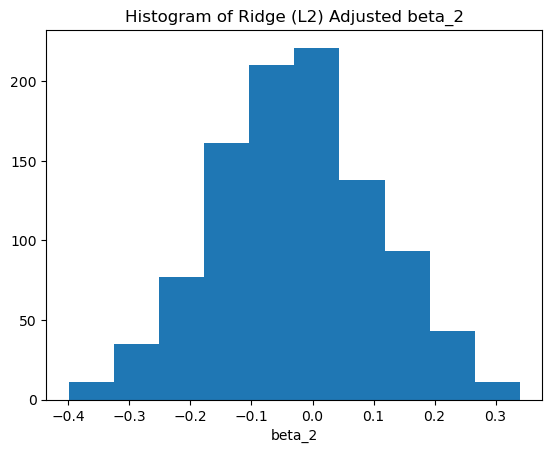

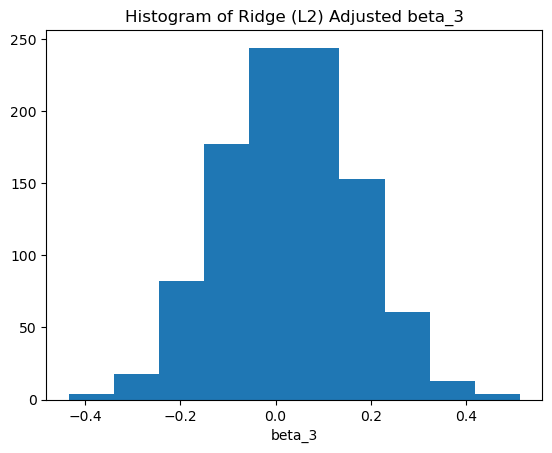

In [23]:

#plt.hist2d(beta_h[:,0], beta_h[:,1])
#Create histograms of coefficients here   
plt.figure(2)
plt.hist(beta_h[:,0])
plt.xlabel('beta_2')
plt.title('Histogram of Ridge (L2) Adjusted beta_1')

plt.figure(3)
plt.hist(beta_h[:,1])
plt.xlabel('beta_2')
plt.title('Histogram of Ridge (L2) Adjusted beta_2')


plt.figure(4)
plt.hist(beta_h[:,2])
plt.xlabel('beta_3')
plt.title('Histogram of Ridge (L2) Adjusted beta_3')

Apply this example with adaptive elastic net to the COPD data.

### Problem Statement


### Example Problem

### The Least Absolute Shrinkage and Selection Operator (LASSO) Regularization
#### Background and Purpose of the Lasso
The Least Absolute Shrinkage and Selection Operator (LASSO) was first named and formally explored in the 1996 paper "Regression Shrinkage and Selection via the Lasso" ([Tibshirani](https://www-jstor-org.aurarialibrary.idm.oclc.org/stable/pdf/2346178.pdf?refreqid=excelsior%3A06345cdd72851bf28a4bedb0ad7b7064&ab_segments=&origin=&initiator=&acceptTC=1))
The Lasso was motivate by the garotte and by generalized $L^p$ regularization.
The Lasso seeks to address the issue of having many predictors, a decent number of which are uncorrelated with the response where a moderate number are correlated with response. In this scenario Ridge Regression and OLS will yield nonzero coefficients for all predictors, leading to erroneous or difficult to interpret models.
Intepreting the above model coefficients requires family-wise confidence intervals and or hypothesis tests for rigorous statistical analysis. It is common for data sets to have thousands or tens of thousands of predictor variables, thus making analysis
Lasso adresses this issue.





1) Dimension reduction of set of regressor variables by setting coefficients of regressor variable that are uncorrelated with response variables to 0.
2) Accomplished by using $L$^1 regularization.

3) Visualize this various norms

### The Formal Lasso Regression Problem
Assume data:  
$(\textbf{x}^i, y^i), i = 1, \cdots, N$.  
$\textbf{x}^i =(x^i_1, \cdots, x^i_M)^T:=$ Predictor Variables  
$y^i:=$ Response Variables  
Assume Data is Standardized:  
$\sum_{i}x^i_j = 0, j = 1, \cdots, N$   
$ \sum_i (x^i_j)^2/N =1, j = 1, \cdots, N$ 
  
Letting $\hat{\beta} =(\hat{\beta}_1, \cdots, \hat{\beta}_M),$ the Lasso estimate $(\hat{\alpha}, \hat{\beta})$ is defined by the the following convex optimization problem.
  
$(\hat{\alpha}, \hat{\beta}) = \text{arg min}_{\alpha, \beta}\{\sum_{i}(y_i - \alpha - \sum_j\beta_jx^i_j)^2\} \qquad$   
$\text{Subject To} \sum_j |\beta_j| \le t$  

$t\ge 0$ is a tunable hyperparameter.  

### Lagrange Formulation
It is common for the Lasso and Ridge Regressor optimization problem to be reformulated using Lagrange multipliers. In the case of the Lasso, the Lagrange formulation is

In [ ]:
### Look into 

### 2-D Visual Explanation of Lasso Penalization:
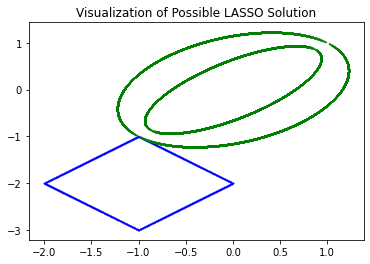


#### Example Problems to Illustrate Uses of Lasso and Issues that may arise with the Lasso.

#### Verifying Example Results Using Generalized Cross Validation

#### Discuss finding the penalization coefficient using GCV as well

#### Applications of the Lasso
1. Basic: First step before a prior to OLS 
2. Dimension Reduction Prior to More Complex Modeling Techniques - Bayesian Networks, Generalized Regression Problems


### The Elastic Net
1. Reference: Regularization and variable selection via the
elastic net [Hastie, T., Zhou, H.](https://hastie.su.domains/Papers/B67.2%20(2005)%20301-320%20Zou%20&%20Hastie.pdf)
2. Background & Motivation
3. Mathematical Formalism - Original Problem & Lagrange Formulation (Combining the two different types of regularization yields desirable properties from both methods)
4. Example Problems & Applications

### The Oracle Property in Data Adaptive Modeling

The Oracle Property was first introduced in the 1994 paper "Ideal Spatial Adaptation by Wavelet Shrinkage" by [Donoho and Johnstone](https://github.com/EDShapiro/MS_Adaptive_Regularization_Project/blob/main/Papers/Donoho-IdealSpatialAdaptation-1994.pdf).  
D & J developed the idea of the Oracle Property around data adaptive methods for fitting an unknown, spatially varying function, $f(t)$ based on stochastic data:
$$y_i = f(t_i) + \epsilon_i, \qquad (i=1,\cdots,n)$$
where $\epsilon \sim N(0,\sigma^2)$, $t_i = i/n$, and $f$ is the unknown function being recovered.  
The goal is to find an estimator $\hat{f}$ of $f$, where the performance of the estimator is measured with the quadratic loss at the sample points. This is motivated by finding an estimator that minimizes the risk function
$$
R(\hat{f},f) = n^{-1}E||\hat{f} - f||_{2,n}^2
$$
The estimators are defined by
$$ \hat{f} = T(y,d(y)),$$
where $T(y,\delta)$ is a reconstruction formula with a spatial smoothing parameter $\delta$, and $d(y)$ is a data-adaptive choice of $\delta$.
### Example
An example of a reconstruction formula would be a piecewise polynomial reconstruction formula, over an interval $I = [0,1],$ where $I$ is partitioned into subintervals $I = (I_1, I_2, \cdots, I_L)$ where the length of each subinterval is dependent on the data, $I_1 = [0, d(y)_1), I_2 = [d(y)_1, d(y)_1 + d(y)_2),\cdots, [d(y)_1+ \cdots + d(y)_{L-1}, d(y)_1+ \cdots + d(y)_{L}]$, where $\sum_{i=1}^L d(y)_i =1$.

$$T_{PP(D)}(y, d(y))(t) = \sum_{l=1}^L\hat{p}_l(t)I_l(t); \qquad \hat{p}_l(t) = \sum_{k=0}a_kt^k.$$


#### Oracle Property Definition
Given an estimator based on a reconstruction formula $\hat{f} = T(y,d(y))$, we say the estimator has the oracle property if it provides the best possible set of data adaptive parameters for fitting the true underlying $f$. Posed in terms of the risk function, the oracle gives us the set of $\delta*$ such that
$$
R(T(y,\delta*),f) = \inf_{\delta}R(T(y,\delta),f).
$$



### Adaptive Lasso
In 2001 Fang and Li studied the Oracle Property in the context of statistical regression with nonconcave penalization functions, and in 2006 Zhou studied the Oracle Property of the adaptive Lasso penalization, [Zou, H., 2006](http://users.stat.umn.edu/~zouxx019/Papers/adalasso.pdf) and extended the definition of the Oracle Property to the  penalized regression setting.  
To define the Oracle property we recall the regression model 
$$y = \beta_0 + \beta_1x_1 + \cdots + \beta_p x_p +\epsilon$$
And define:
$$ \mathcal{A} = \{j:\beta_j \neq 0 \},$$
or the set of indices of the true nonzero coefficients of the regression model.  
We also assume $|\mathcal{A}| = p_0 < p.$  
Define $\textbf{$\hat{\beta}(\delta)$}$ as an estimator of $\beta$ corresponding to the fitting procedure $\delta$.  
$\delta$ is defined to be an Oracle procedure if, asymptotically, $\hat{\beta}(\delta)$ has the following oracle properties:  
1.  Consistent in variable selection: $Pr(\{j: \hat{\beta_j} \neq  0\} = \mathcal{A}) \to 1$ as $n\to \infty$.
2.  Asymptotic normality of the estimator: $\hat{\beta}$: $\sqrt{n}(\hat{\beta}(\delta)_{\mathcal{A}} - \beta_{\mathcal{A}})
\to \mathcal{N}(0, \Sigma)$, where $\Sigma$ is the covariance matrix of the true subset model.  

In [Zou, H., 2006](http://users.stat.umn.edu/~zouxx019/Papers/adalasso.pdf) Zhou showed that the Lasso is, in general, not a consistent estimator of the true set of coefficients. Meaning that as the training size increases, we cannot expect the Lasso to identify $\mathcal{A}$.  
Zhou developed the data adaptive Lasso, with the following objective function
$$\beta(alasso) = \min_{\beta} ||y-X\beta||_2^2 + \lambda_1\sum_{i=1}^p w_i|\beta_i|,$$
where the $w_i$ are data adaptive coefficients.
Using the coefficients as derived from standard OLS, $\beta(OLS)$ Zhou defined $w_j = |\beta_j(OLS)|^{-\gamma},$ for $ j = 1, \cdots, p$ and where $\gamma >1$, and showed that, given these weights, and the following regularity conditions, that $\beta(alasso)$ has the oracle property.  

Pause to explain intuitvely why this works.



### The Adaptive Elastic Net
In 2009, Zhou and Zhang analyzed the Elastic Net, and showed that the standard elastic net is also an inconsistent estimator for variable selection. Building on the work of the Adaptive Lasso, they developed the Adaptive Elastic Net (AENET). Zhou and Zhang incorporated the Ridge Regularization into the Adaptive Lasso to tap into stability property of the Ridge. In their paper, on "Adaptive Elastic Net with a Diverging Number of Parameters", Zhou and Zhang showed (AENET) has the following properties:
1. Consistency in feature selection.
2. Stability in model coefficients, and accuracy in magnitude.
3. Asymptotic normality of estimators.
The Adaptive Elastic Net is solved by:
1. Solving for $\beta(enet),$ and $\lambda_2$, by minimizing the original Elastic Net cost function and searching the hyper-parameter space using cross validation.
2. Minimizing the following Adaptive Elastic Net cost function
$$\beta(alasso) = \min_{\beta} ||y-X\beta||_2^2 + \lambda_1^*\sum_{i=1}^p w_i|\beta_i| +\lambda_2\sum_{i=1}^p w_i|\beta_i|^2,$$
where we tune over $\lambda_1^*.$  

The following regularity conditions guarantee that the solution to the Adaptive Elastic Net has the above desired properties.
### Regularization Conditions
1. (X^TX) is somewhat well conditioned. Let $\lambda_{min}(M)$ be the minimum eigenvalue of the matrix M and let $\lambda_{max}(M)$ be the maximum eigenvalue of M. The we assume there exists real $b,B$ such that 
$$ b\le \lambda_{min}(X^TX) \le \lambda_{max}(X^TX) \le B$$

2. $\lim_{n \to \infty} \frac{\max_{i=1, \cdots, n}\sum_{j=1}^p x_{i,j}^2}{n} = 0$
3. E[$|\epsilon|^{\delta + 2}]< \infty$ for some $\delta>0$
4. $\lim_{n\to \infty}\frac{log(p)}{log(n)} = \nu$ for $0 \le \nu <1.$
5. $\lim_{n \to \infty} \frac{\lambda^*}{\sqrt{n}} = 0$, $\lim_{n \to \infty} \frac{\lambda^*}{\sqrt{n}}n^{\frac{(1-\nu)(1+\gamma) -1}{2}} = \infty$
6. $\lim_{n\to \infty}\frac{\lambda_2}{\sqrt{n}}\sqrt{\sum_{j\in \mathcal{A}}\beta_j^2}$,   $\lim_{n \to \infty}min(\frac{n}{\lambda_1\sqrt{p}},(\frac{\sqrt{n}}{\lambda_1^*\sqrt{p}})^{1/\gamma})(\min_{j\in \mathcal{A}}(\beta^*_j)$

For proofs on how these constraints lead to the consistency and asymptotic normality of $\hat{\beta}(aenet)$ 



#### Adaptive Elastic Net
[Zou, H., Zhang, H.H. 2009](https://projecteuclid.org/journals/annals-of-statistics/volume-37/issue-4/On-the-adaptive-elastic-net-with-a-diverging-number-of/10.1214/08-AOS625.full)
1. Mathematics
2. Comparison to Elastic Net in Theory

#### Overview of CVXPy

#### Example: Implementing Adaptive Methods in Python

Text(0.5, 1.0, 'Histogram of # of Incorrect nonzero coefficients in Elastic Net (N=30)')

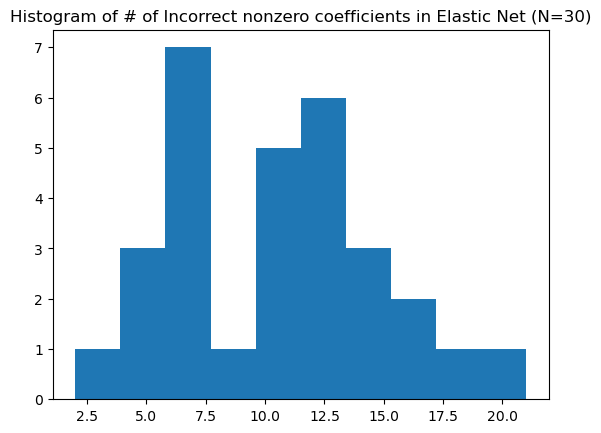

In [1]:
import numpy as np
import scipy as sp

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
#Zhou & Zhang Numerical Example From "On the Adaptive Elastic-Net With a 
#Diverging Number of Parameters" 2006
#Adaptive ENet Cost function := 
# min_{beta}|| y -Xbeta||_2^2 + lambda_2||beta||_2^2 + lambda_1*sum_j\hat{w_j}|beta_j|
# lambda_2 = solution for lamdba_2 from original elastic net
# lambda_1* := New hyper parameter, solved ofr using cross validation <\infty (bounded)
#\hat{w}_j:= (|beta(enet)_j|)^(-gamma), or (|beta(enet)_j| + n)^(-gamma) 
#to avoid divison by 0
# n:= number of observations
# p_n:= number of parameters (increase as n increases)
#p_n is O(n^(nu))
#nu := lim_{n\to \infty} log(p)/log(n) 0 =< nu =< 1
#p_n = [4n^(1/2)] - 5
# n =100
#nu = 1/2
#gamma := hyper-parameter, constraint gamma > 2nu/(1-nu)
#gamma = 2nu/(1-nu) + 1 for convenience 
#A := set of indices for nonzero coefficients from the elastic net
#Cov := Covariance Matrix, rho^(|j-k|), rho = 0.5
#Sklearn uses different weights for norms in the enet cost function:
#alpha := Lambda_1 + Lambda_2; l1_ratio = Lambda_1/(lambda_1 + lambda_2)
#lambda_1 = alpha(l1_ratio); lambda_2 = alpha*(1-l1_ratio)

def check_sym(Cov, pn):
    for i in range(0, pn):
        for j in range(0,pn):
            print(Cov[i,j] == Cov[j,i])

#N:= Number of samples collected, not sample size
N = 30
n = 200
#Adaptive Elastic Net Parameters
pn = int(4*n**(1/2) -5)
q = int(round(pn/9))
nu = 1/2
gamma = 2*nu/(1-nu) + 1

Cov = np.zeros((pn, pn ))
rho = 0.5

y_sigma = 1

for i in range(0, pn):
    for j in range(0,pn):
        Cov[i,j] = rho**(np.abs(i-j))

mu = np.zeros(pn)
mv_norm = sp.stats.multivariate_normal( mean = mu, cov = Cov)
beta_h = np.zeros(pn)
beta_h_nz = np.ones(q*3)*0.5
beta_h[0:q*3] = beta_h_nz 

l1 = np.linspace(0.02, 0.9, 20)
alpha = np.logspace(-2, 1, 20)
search_dict = {'l1_ratio': l1, 'alpha': alpha}



#Initializing data arrays
X = mv_norm.rvs(size = n*N)
Y = np.zeros((n,N))



beta_arr = np.zeros((N,pn))
ad_w_arr = np.zeros((N,pn))
hist_arr = np.zeros(N)
alpha = np.zeros(N)
l1_ratio = np.zeros(N)
lambda_2 = np.zeros(N)

for i in range(0,N):
    Y[:,i] = np.dot(X[i*n:(i+1)*n,:],beta_h) + np.random.normal(0,y_sigma, size = n )
    ENet = ElasticNet(random_state = 42)
    reg =  GridSearchCV(ENet, search_dict)
    reg.fit(X[i*n:(i+1)*n,:],Y[:,i])
    
    alpha [i]= reg.best_params_['alpha']
    l1_ratio[i] = reg.best_params_['l1_ratio']
    lambda_2[i] = alpha[i]*(1-l1_ratio[i])

    beta_arr[i,:] = reg.best_estimator_.coef_
    ad_w_arr[i,:] = (reg.best_estimator_.coef_ + 1/n)**(-gamma)
    hist_arr[i] = np.sum(np.abs(beta_h.astype(bool).astype(int) - reg.best_estimator_.coef_.astype(bool).astype(int)))

#Write code to identify first index where lambda_1 results in a set correct coefficients


#Incorporate everything into a single useful function after putting together real data example.
#Inputs
#Plot histogram of correct nonzero parameters from elastic net solution
plt.figure(0)
plt.hist(hist_arr)
plt.title('Histogram of # of Incorrect nonzero coefficients in Elastic Net (N=30)')

/Users/evanshapiro/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


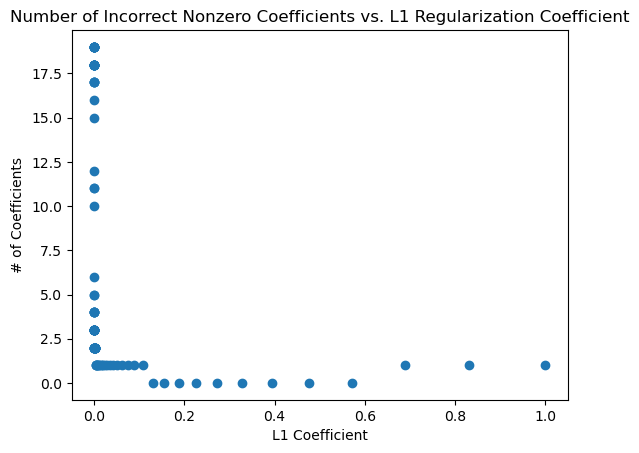

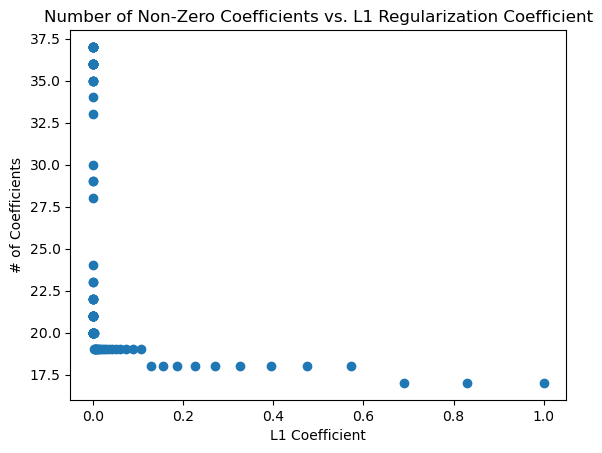

In [2]:
import cvxpy as cp

def loss_fn(X, Y, beta):
    return cp.norm2(X @ beta - Y)**2

#aenet objective function takes weights from a lasso and uses them to weight
# the coefficients in the regularization function 

#Weights \hat{w}_j :=(|\hat{beta}_j(enet)| +1/n)^{-\gamma}; gamma \ge 0
#lambda_2:= lambda_2 from original elastic-net 
#lambda_1*:= New hyperparameter thatis determined via CV, or some such nonsense.

def aenet_objective_fn(X, Y, beta, lambd_1, lambd_2, weights):
    return loss_fn(X, Y, beta) + lambd_1 * cp.norm1(cp.multiply(weights,beta)) + lambd_2*cp.norm2(beta)


def mse(X, Y, beta):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, beta).value


n_lmbda = 100  # number of lambda_1 values
beta = cp.Variable(pn)
lambda_1 = cp.Parameter(nonneg=True)
#lambd_2 = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(aenet_objective_fn(X[0:n,:], Y[:,0], beta, lambda_1, lambda_2[0], ad_w_arr[0,:])))

#Compare solution to solution where where weights for coefficients that were 0 
#in ENet are also zero. 

lambda_values = np.logspace(-8, 0, n_lmbda)
train_errors = []
test_errors = []
beta_values = []
for v in lambda_values:
    lambda_1.value = v
    #lambd_2.value = v
    problem.solve()
    train_errors.append(mse(X[0:n,:], Y[:,0], beta))
    test_errors.append(mse(X[0:n,:], Y[:,0], beta))
    beta_values.append(beta.value)
    


beta_v_t = np.zeros((n_lmbda, pn))
beta_err_count = np.zeros(n_lmbda)
beta_count = np.zeros(n_lmbda)

for i in range(0,n_lmbda):
    for j in range(0,pn):
        if beta_values[i][j] <= 0.00001:
            beta_v_t[i,j] = 0
        else:
            beta_v_t[i,j] = beta_values[i][j]
            
    beta_err_count[i] = np.abs(np.sum(beta_h.astype(bool).astype(int) - beta_v_t[i,:].astype(bool).astype(int)))
    beta_count[i] = np.abs(np.sum(beta_v_t[i,:].astype(bool).astype(int)))
    
plt.figure(0)
plt.scatter(lambda_values, beta_err_count)
plt.title('Number of Incorrect Nonzero Coefficients vs. L1 Regularization Coefficient')
plt.xlabel('L1 Coefficient')
plt.ylabel('# of Coefficients')
#Make sure to connect the number of incorrect nonzero coefficients to the 
#number of nonzero coefficients from the elastic net

#Create loop to feed in all results from unit test to determine whether AEnet
#controls variance in parameters 


plt.figure(1)
plt.scatter(lambda_values, beta_count)
plt.title('Number of Non-Zero Coefficients vs. L1 Regularization Coefficient')
plt.xlabel('L1 Coefficient')
plt.ylabel('# of Coefficients')

#Identify index of first lambda_1 value where set of nonzero predictor variables is correct
lmbda_idx = np.min(np.where(beta_err_count ==0))
lmbda_1_sol = lambda_values[lmbda_idx]

In [ ]:
plt.figure(0)
Y_pred_enet = np.dot(X[0:n,:], beta_arr_t)
Y_pred_aenet = np.dot(X[0:n,:],beta_v_t[91,:])
plt.scatter(Y[:,0],Y_pred_enet, color = 'r')
plt.scatter(Y[:,0],Y_pred_aenet, color = 'b' )
plt.ylabel('Y_predicted')
plt.xlabel('Y_true')
plt.title('Overlay of Predictions from ENete and AENet vs True')

for i in range(0,51): 
    if np.abs(beta_arr[0,i]) <0.5:
        beta_arr_t[i] = 0 
    else: 
        beta_arr_t[i] = beta_arr[0,i]

#### Comparison of Results from Elastic Net & Adaptive Elastic Net